We have stored the 2015 NAAMES data to Azure Cloud Storage and to read it we will use the Python API. 

ifcb storage account -> naames container -> NAAMES_ml folder

In [27]:
import matplotlib.pyplot as plt

In [28]:
import imageio

In [13]:
import getpass

In [15]:
import azure.storage.blob

In [17]:
connection_string = getpass.getpass()

 ···················································································································································································


In [35]:
container_client = azure.storage.blob.ContainerClient.from_connection_string(
    connection_string, container_name="naames"
)

In [36]:
# we limit to a subfolder to test the functionality
blobs_list = container_client.list_blobs(name_starts_with='NAAMES_ml/D20151102T161705_IFCB107')

In [38]:
container_name = 'naames'
account_name = 'ifcb'

In [39]:
# attach the azure url
blob_urls = (f"https://{account_name}.blob.core.windows.net/{container_name}/{blob.name}" for blob in blobs_list)

In [40]:
%%time
dataset = []
failed_urls = []
for blob_url in blob_urls:
    # print(blob_url)
    # select 'png'
    if 'png' in blob_url:
        try:
            image = imageio.imread(blob_url)
            dataset.append(image)
        except Exception as e:
            failed_urls.append(blob_url)
            pass
        

CPU times: user 1min 2s, sys: 5 s, total: 1min 7s
Wall time: 42min 8s


In [42]:
print(failed_urls)

['https://ifcb.blob.core.windows.net/naames/NAAMES_ml/D20151102T161705_IFCB107/IFCB107D20151102T161705P02219.png', 'https://ifcb.blob.core.windows.net/naames/NAAMES_ml/D20151102T161705_IFCB107/IFCB107D20151102T161705P03075.png']


In [41]:
len(dataset)

4117

In [25]:
# show an image

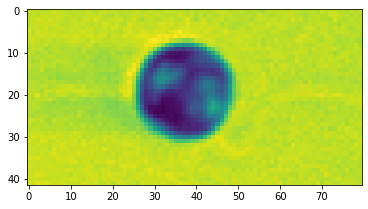

In [43]:
plt.imshow(dataset[0])

In [30]:
dataset[0]